# Clustering Conformations using Python Libraries



In [44]:
import os
import numpy as np
import matplotlib
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, to_tree, centroid
from matplotlib import pyplot as plt
import copy
from sympy.utilities.iterables import multiset_permutations


## Requirements
Scipy, Numpy, Matplotlib, pickle, copy, sympy, os


### Testing Accuracy
Passing in already grouped and sorted arrays of the clusters and arrays of the groups derived from annotations, I've implemented two methods to test the accuracy.
The first one is faster using sampling to see which cluster matches which group while the second one attempts to fit all of the permutations of groups to clusters.

In [25]:
def bin_search(arr, l, h, x):
    # Check base case
    if x>arr[h]:
        return False
    if h >= l:
        m = (h+ l) // 2
        if arr[m] == x:
            return True
        elif arr[m] > x:
            return bin_search(arr, l, m- 1, x)
        else:
            return bin_search(arr, m + 1, h, x)
    else:
        return False
def test_acc(n,group_list,annotated_group_list):
    """l1, list of lists, each sublist is the group, results derived from the tree. Order of annotatated_group_list: open_active_list,closed_inactive_list,open_inactive_list"""
    tot_counter = 0
    for sublist in group_list:
        #print(f"len(annotated_group_list): {len(annotated_group_list)}")
        counters = [0 for _ in range(len(annotated_group_list))] #triple of sampled tripe accuracy
        if len(counters)>1:
            samples =[sublist[0],sublist[len(sublist)//4],sublist[len(sublist)//2],sublist[3*len(sublist)//4],sublist[-1]]
            for i,annotated_subgroup_list in enumerate(annotated_group_list):
                for sample in samples:
                    #print(f"sample: {sample} searching in annotated_subgroup[{i}]")
                    if bin_search(annotated_subgroup_list,0,len(annotated_subgroup_list)-1,sample): #if the sampled index is found increment the counter
                        counters[i]+=1
                        samples.pop(samples.index(sample))
        #print(f"counters: {counters}")
        best_fit_list =annotated_group_list.pop(counters.index(max(counters)))
        for element in sublist:
            if bin_search(best_fit_list,0,len(best_fit_list)-1,element):
                tot_counter +=1
    return tot_counter/n *100.00
            
def test_acc2(n,group_list, annotated_group_list):
    a = np.arange(len(group_list))
    #print(f"a: {a}")
    all_permutations=list(multiset_permutations(a))
    #print(f"all_permutations: {all_permutations}")
    total_counts=[0 for _ in range(len(all_permutations))]
    for i,permutation in  enumerate(all_permutations):
        for k,subgroup_list in enumerate(group_list):
            for element in subgroup_list:
                if bin_search(annotated_group_list[permutation[k]],0,len(annotated_group_list[permutation[k]])-1,element):
                    total_counts[i]+=1
    return max(total_counts)/n *100.00
            


        



## Display classification visually
Creates a simple visualization with different shades as different groups.

In [3]:
def display_classification(l1,g1,g2,g3, l=4, r=100, c=50):
    """l1 list of conformations and g1,g2, and g3 are the classification groups.
    l,r,c are formatting parameters indent length, rows, columns respectively"""
    

    print()

    for i in range(0, r):
        print(str(i) + " " * (l - len(str(i))), end="")
        for j in range(0, c):
            if i*c+j > len(l1)-1:
                return 
            a = l1[i*c+j]
            #print(f"a: {a}")
            if a in g1: 
                print('█', end="")
            elif a in g2:
                print('░', end="")
            elif a in g3:
                print(' ', end="")
        print()

## Load presorted classification based on annotations list

In [4]:
with open("chains_list.var","rb") as chains_list_var:
   chains_list = pickle.load(chains_list_var)
print(f"chains_list: {chains_list}")
with open("structures/opened_active.var", "rb") as open_active_var:
    open_active_list = pickle.load(open_active_var)
    open_active_var.close()
with open("structures/closed_inactive.var", "rb") as closed_inactive_var:
    closed_inactive_list = pickle.load(closed_inactive_var)
    closed_inactive_var.close()
with open("structures/opened_inactive.var", "rb") as open_inactive_var:
    open_inactive_list = pickle.load(open_inactive_var)
    open_inactive_var.close()

print(f"open_active: {open_active_list}")
print(f"closed_inactive: {closed_inactive_list}")
print(f"open_inactive: {open_inactive_list}")
annotated_group_list = [[],[],[]]
for i,conformation in enumerate(chains_list):
    for j,l in enumerate([open_active_list,closed_inactive_list,open_inactive_list]):
        if conformation in l:
            annotated_group_list[j].append(i)
print(f"annotated_group_list: {annotated_group_list}")
            



chains_list: ['1AQ1_A', '1B38_A', '1B39_A', '1BUH_A', '1CKP_A', '1DI8_A', '1DM2_A', '1E1V_A', '1E1X_A', '1E9H_A', '1E9H_C', '1F5Q_A', '1F5Q_C', '1FIN_A', '1FIN_C', '1FQ1_B', '1FVT_A', '1FVV_A', '1FVV_C', '1G5S_A', '1GIH_A', '1GII_A', '1GIJ_A', '1GY3_A', '1GY3_C', '1GZ8_A', '1H00_A', '1H01_A', '1H07_A', '1H08_A', '1H0V_A', '1H0W_A', '1H1P_A', '1H1P_C', '1H1Q_A', '1H1Q_C', '1H1R_A', '1H1R_C', '1H1S_A', '1H1S_C', '1H24_A', '1H24_C', '1H25_A', '1H25_C', '1H26_A', '1H26_C', '1H27_A', '1H27_C', '1H28_A', '1H28_C', '1HCK_A', '1HCL_A', '1JST_A', '1JST_C', '1JSU_A', '1JSV_A', '1JVP_P', '1KE5_A', '1KE6_A', '1KE7_A', '1KE8_A', '1KE9_A', '1OGU_A', '1OGU_C', '1OI9_A', '1OI9_C', '1OIQ_A', '1OIR_A', '1OIT_A', '1OIU_A', '1OIU_C', '1OIY_A', '1OIY_C', '1OKV_A', '1OKV_C', '1OKW_A', '1OKW_C', '1OL1_A', '1OL1_C', '1OL2_A', '1OL2_C', '1P2A_A', '1P5E_A', '1P5E_C', '1PF8_A', '1PKD_A', '1PKD_C', '1PW2_A', '1PXI_A', '1PXJ_A', '1PXK_A', '1PXL_A', '1PXM_A', '1PXN_A', '1PXO_A', '1PXP_A', '1PYE_A', '1QMZ_A', '1QMZ_

### Open calculated rms matrix and chains list
#### matrix.var
Calculated rms matrix from aligning all of the choice conformation chosen by best_align.py and calculated by pml_script_all.py.
#### chains_list.var
Generated by reading through the dictionary of annotated conformations and making a list of chains of the conformation. This will give the labeling order of the rms matrix obtained since pml_script_all.py iterated through this list

In [5]:
with open("matrix.var", "rb") as matrix_var:
   matrix = pickle.load(matrix_var) 
print(f"matrix: {matrix}")


matrix: [[ 0.         13.25406361 13.29579353 ... 17.6447525  13.55326748
  13.55446911]
 [13.25406361  0.          0.34217316 ... 12.41855717 12.69743824
  12.71867657]
 [13.29579353  0.34217316  0.         ... 12.4429369  12.69796753
  12.71866226]
 ...
 [17.6447525  12.41855717 12.4429369  ...  0.         18.47461891
  18.48491287]
 [13.55326748 12.69743824 12.69796753 ... 18.47461891  0.
   0.30317611]
 [13.55446911 12.71867657 12.71866226 ... 18.48491287  0.30317611
   0.        ]]


## Visualization of Conformation Groups
Using the display classification function to visually represent the conformation chain groups. Black background is assumed of the notebook.
White: open-active
Grey: open-inactive
Uncolored: closed-inactive

In [6]:
display_classification(chains_list,open_active_list,open_inactive_list,closed_inactive_list, l=4, r=100, c=25)


0   ░      ░░██░░░░█ ░░ ░░░██
1   ░      ██████████████████
2     ███       ████   ████░░
3   ░░░░░░ ██ ██          ██ 
4   ░░  ░░  ░█░   ░     ░░░░░
5   ░  ░░░░░░░░░░        ████
6   ████     ██░░░██████ █   
7              ░░████████░░░░
8   ░░  ░░  ░░    ░░  ░ ░░░░░
9   ░░░░░████░░░░░░  ████████
10  ████░░░░░░  ░░       ██  
11         ████              
12                           
13                           
14                 ██     ███
15  █████████  ████████████  
16       ████████████████████
17  ██                ░░ ████
18              ██      ░░   
19  ██ ██         █████████  
20  █   ░░                ███
21  █   ██

## Hierarchical clustering algorithms using Scipy
These algorithms rely on a distance matrix computed at each iteration.
$d[i,j]$ is distance between cluster _i_ and _j_ in the original forest
We also define clusters _s_, _t_, _u_ formed from _s_ and _t_ which are then removed as _u_ is added to the forest. Finally we introduce cluster _v_ a cluster that is not _u_ unused after the formation of _u_.

### Ward's Algorithm
A linkage with minimum variance method. We define 
$$
T = |v| + |s| + |t|
$$
As the cardinality the forest _u_ and _v_ combined
Given the distance function is computed recursively with the equation:
$$
d[i][j] = d(i,j) = \sqrt{\frac{|v| + |s|}{T}d(v,s)^2 + \frac{|v| + |t|}{T}d(v,t)^2 - \frac{|v|}{T}d(s,t)^2}
$$
The merging cost, of which ward's algorithm tries to minimize the growth is defined as follows:
$$
Cost(u,v) = \frac{|u||v|}{|u| +|v|}||c_u - c_v ||^2
$$
$c_i$ is the vector of the centroid. And the derivation comes from the distance sum union of the two sets together minus the distance sum of the individual sets. 
<br>
It considers the case of merging and then calculates the variance from the centroid of the final merged cluster as the distance


/var/folders/rf/gvtptwp96wvd1g29v6rqbgj40000gn/T/ipykernel_12992/1136461341.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out_ward = linkage(matrix, 'ward')


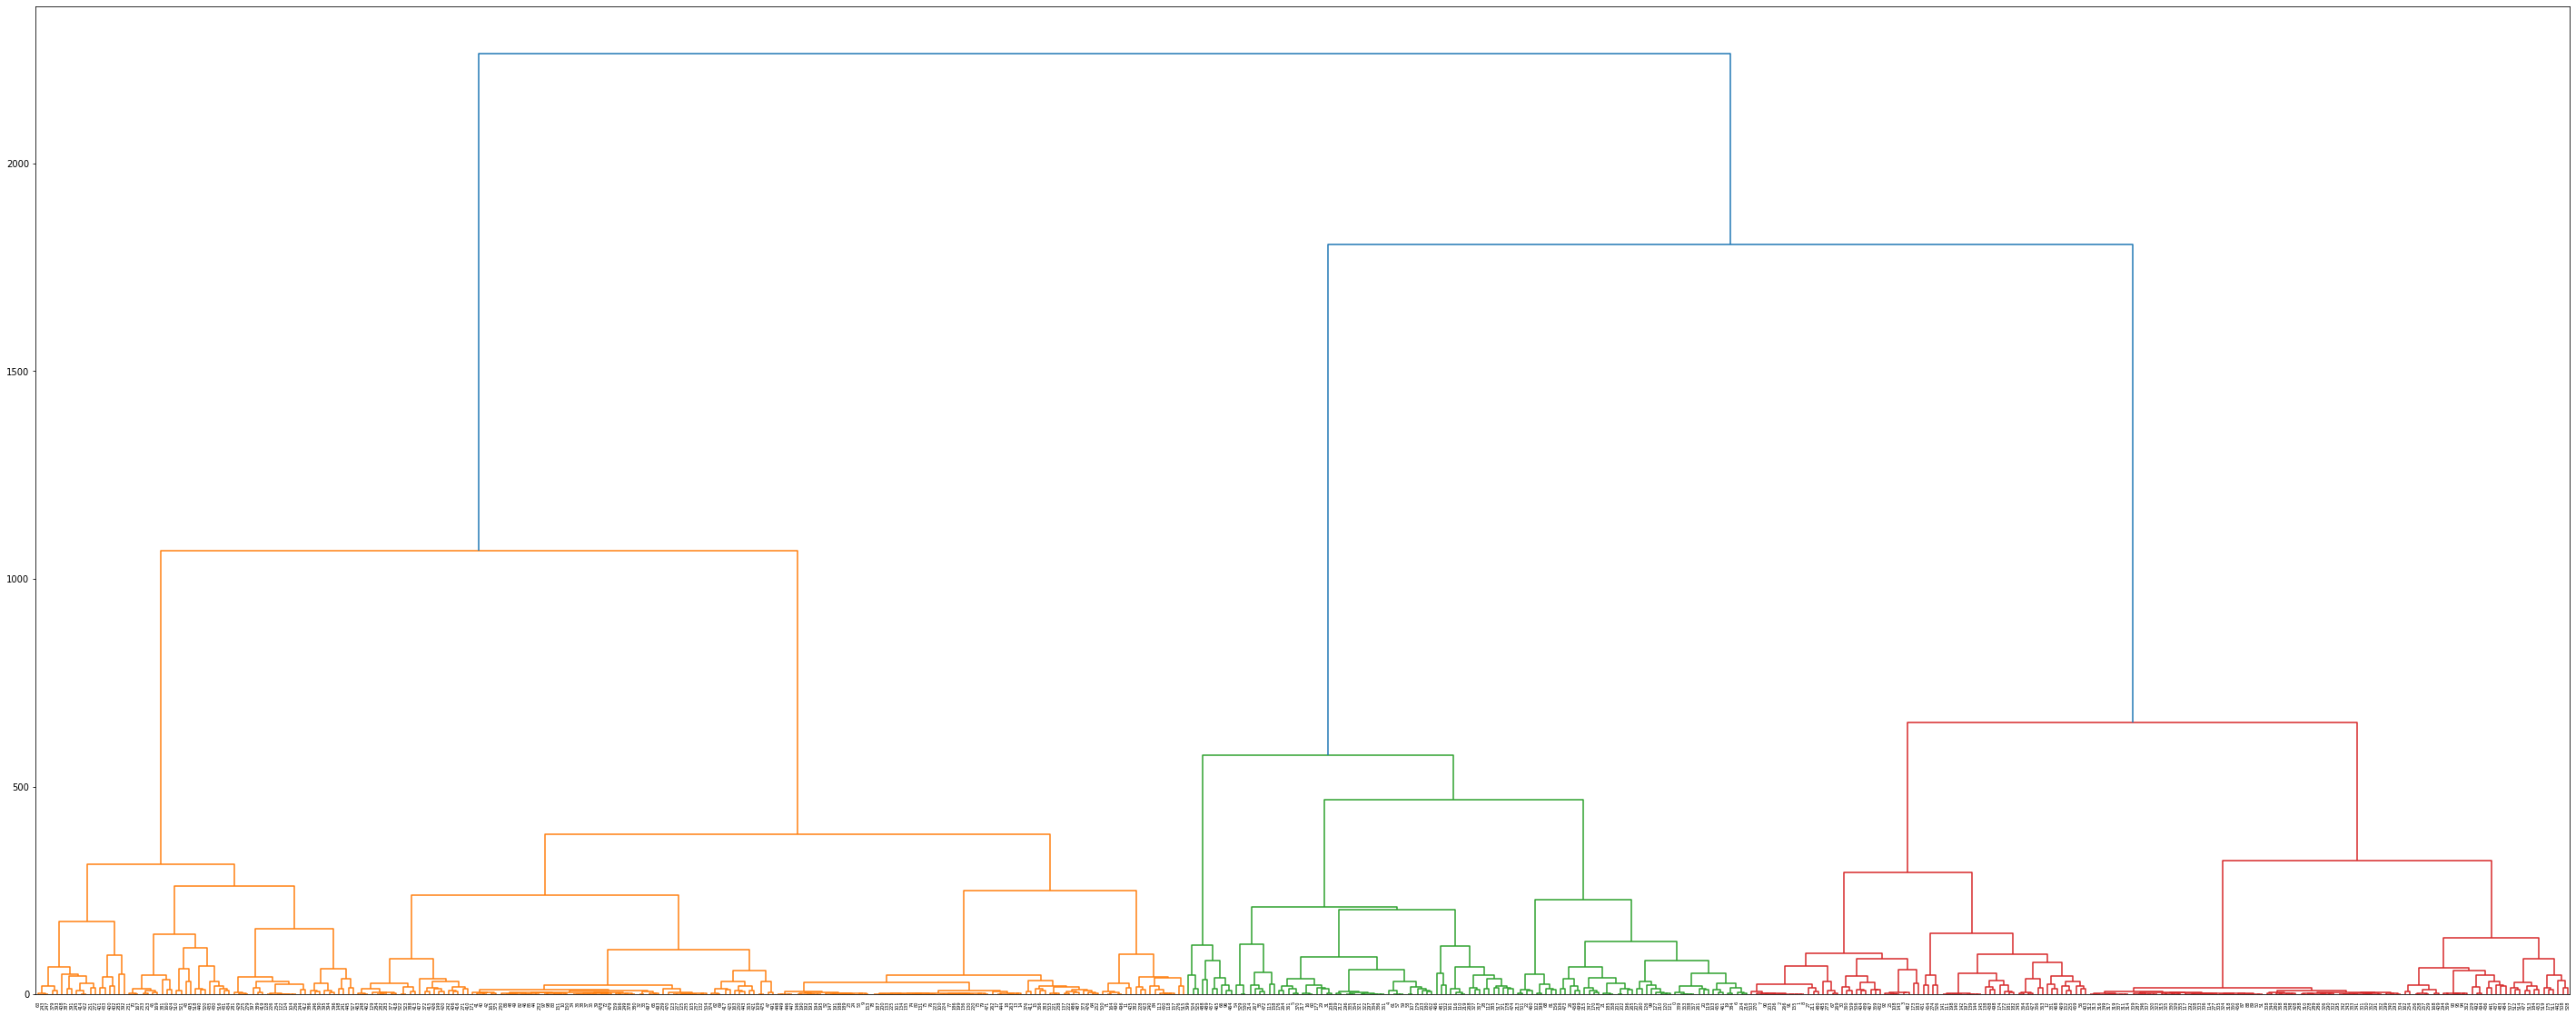

In [35]:
out_ward = linkage(matrix, 'ward')
fig = plt.figure(figsize=(50,20))
dn = dendrogram(out_ward)


In [38]:
l = leaves_list(out_ward)
#print(f"leaves_list: {l}")
tree = to_tree(out_ward)
##############################
#Split the trees into usable groups
yellow_tree = tree.get_left()
green_tree = tree.get_right().get_left()
red_tree = tree.get_right().get_right()
idx1= yellow_tree.count
idx2= idx1+green_tree.count
grouped_list_ward = [np.sort(l[:idx1]),np.sort(l[idx1:idx2]),np.sort(l[idx2:])]
n = tree.count
#print(f"grouped_list: {grouped_list}")
acc1=test_acc(n,grouped_list_ward,copy.deepcopy(annotated_group_list))

print(f"acc1: {acc1}")


acc1: 59.69868173258004


### Much higher complexity but more accurate version of test_acc


In [39]:
acc2=test_acc2(n,grouped_list_ward,copy.deepcopy(annotated_group_list))
print(f"acc2: {acc2}")

a: [0 1 2]
all_permutations: [[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]
acc2: 59.69868173258004


The accuracy of both tests matched that means the sampling test accuracy has good accuracy too.

## Single link
Using the distance between the closest elements in the clusters.
$$
d(u,v)= min(d(u_i,v_j))\\
 \forall 1\leq i \leq |u|, \forall 1\leq j \leq |v| 
$$

However, this method might create long chains as shown in the results below.

/var/folders/rf/gvtptwp96wvd1g29v6rqbgj40000gn/T/ipykernel_12992/1707382825.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out_single = linkage(matrix, 'single')


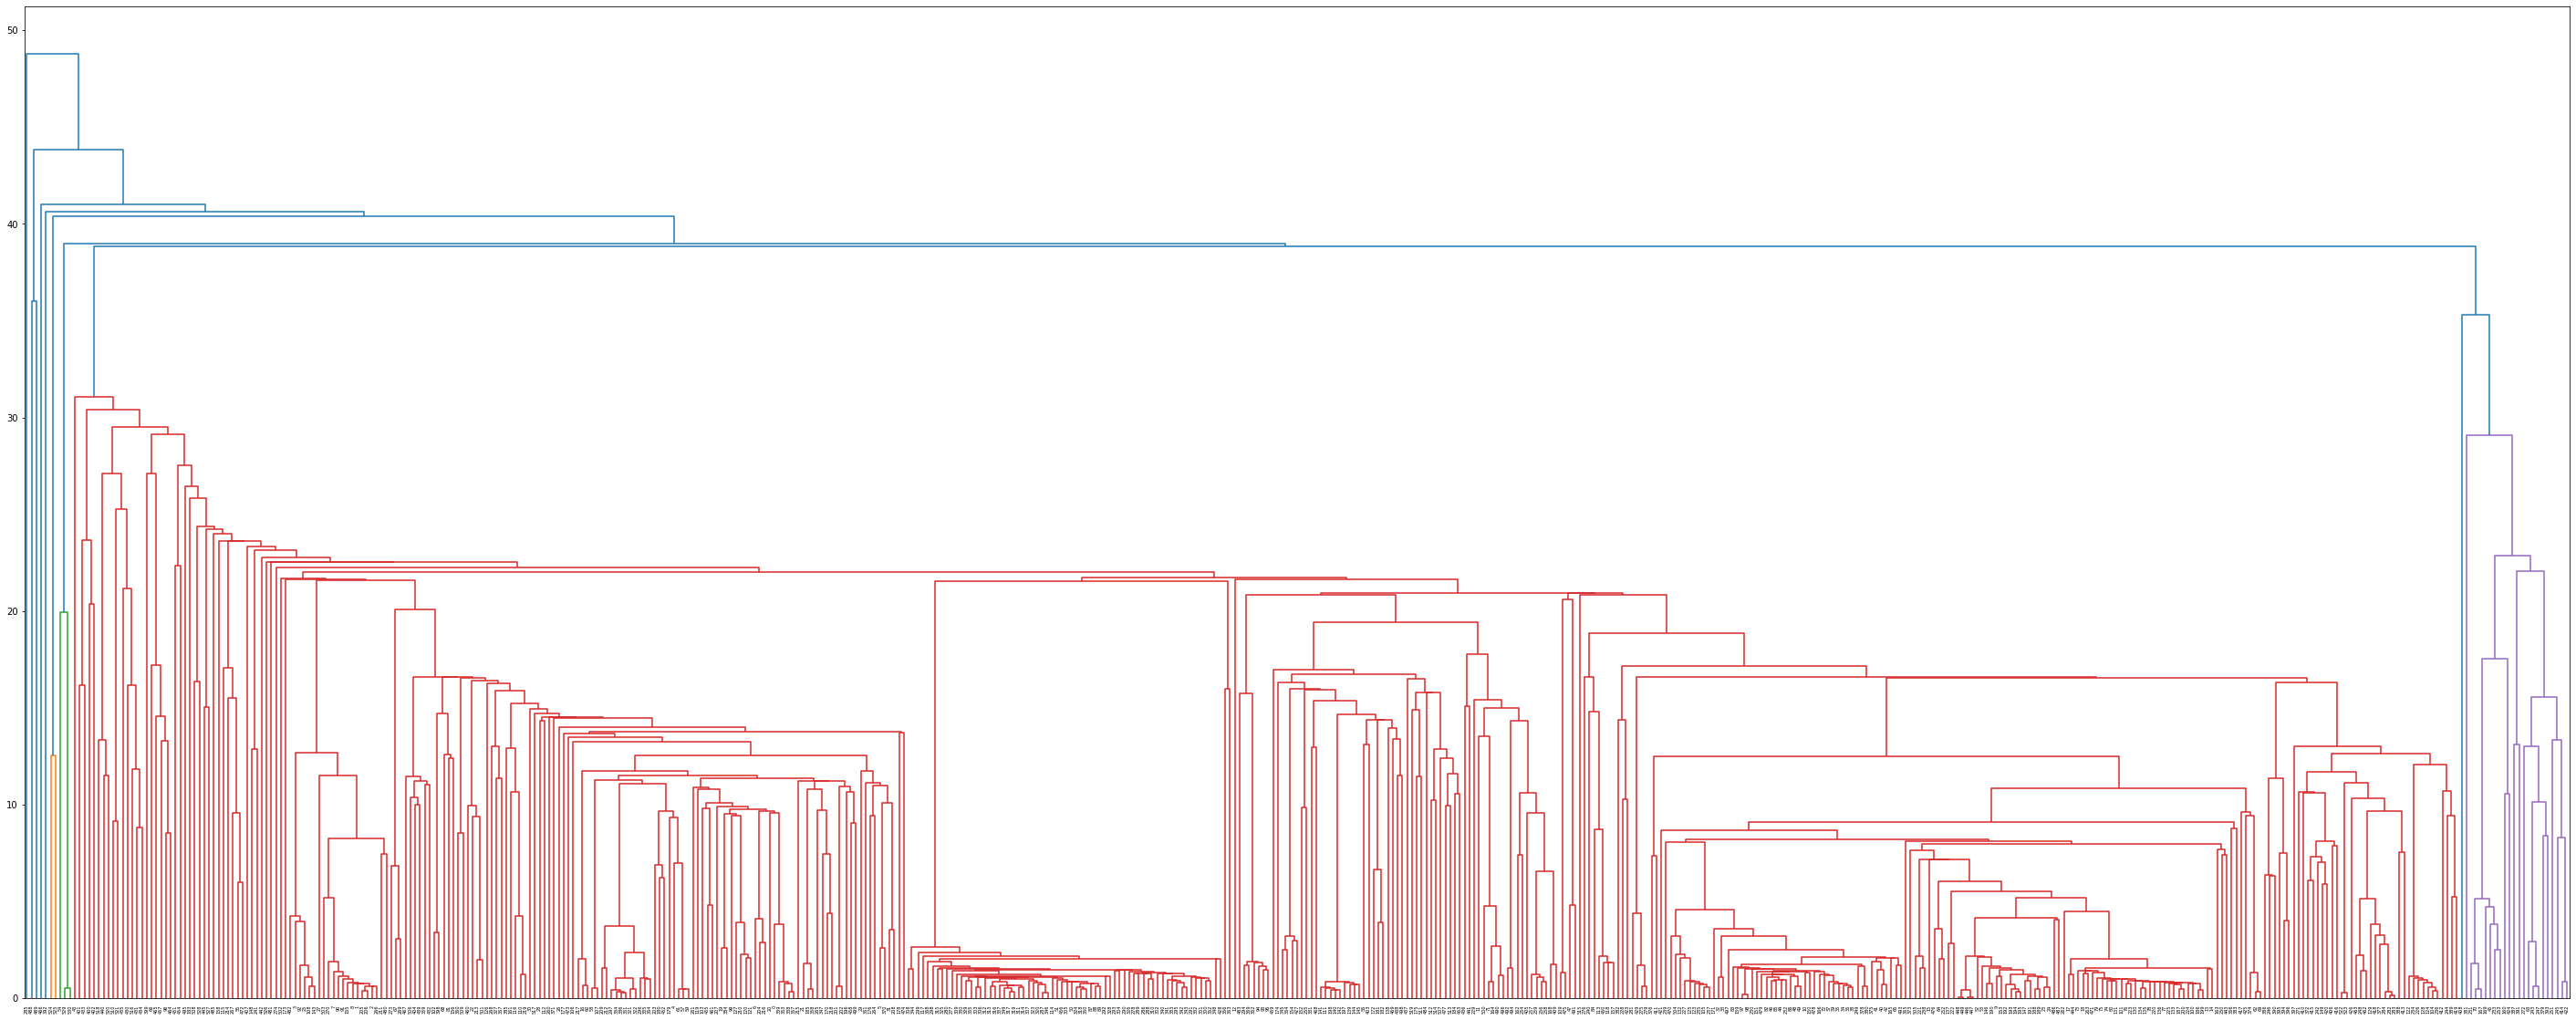

In [33]:
out_single = linkage(matrix, 'single')
fig = plt.figure(figsize=(50,20))
dn = dendrogram(out_single)


/var/folders/rf/gvtptwp96wvd1g29v6rqbgj40000gn/T/ipykernel_12992/3184923608.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out_average = linkage(matrix, 'average')


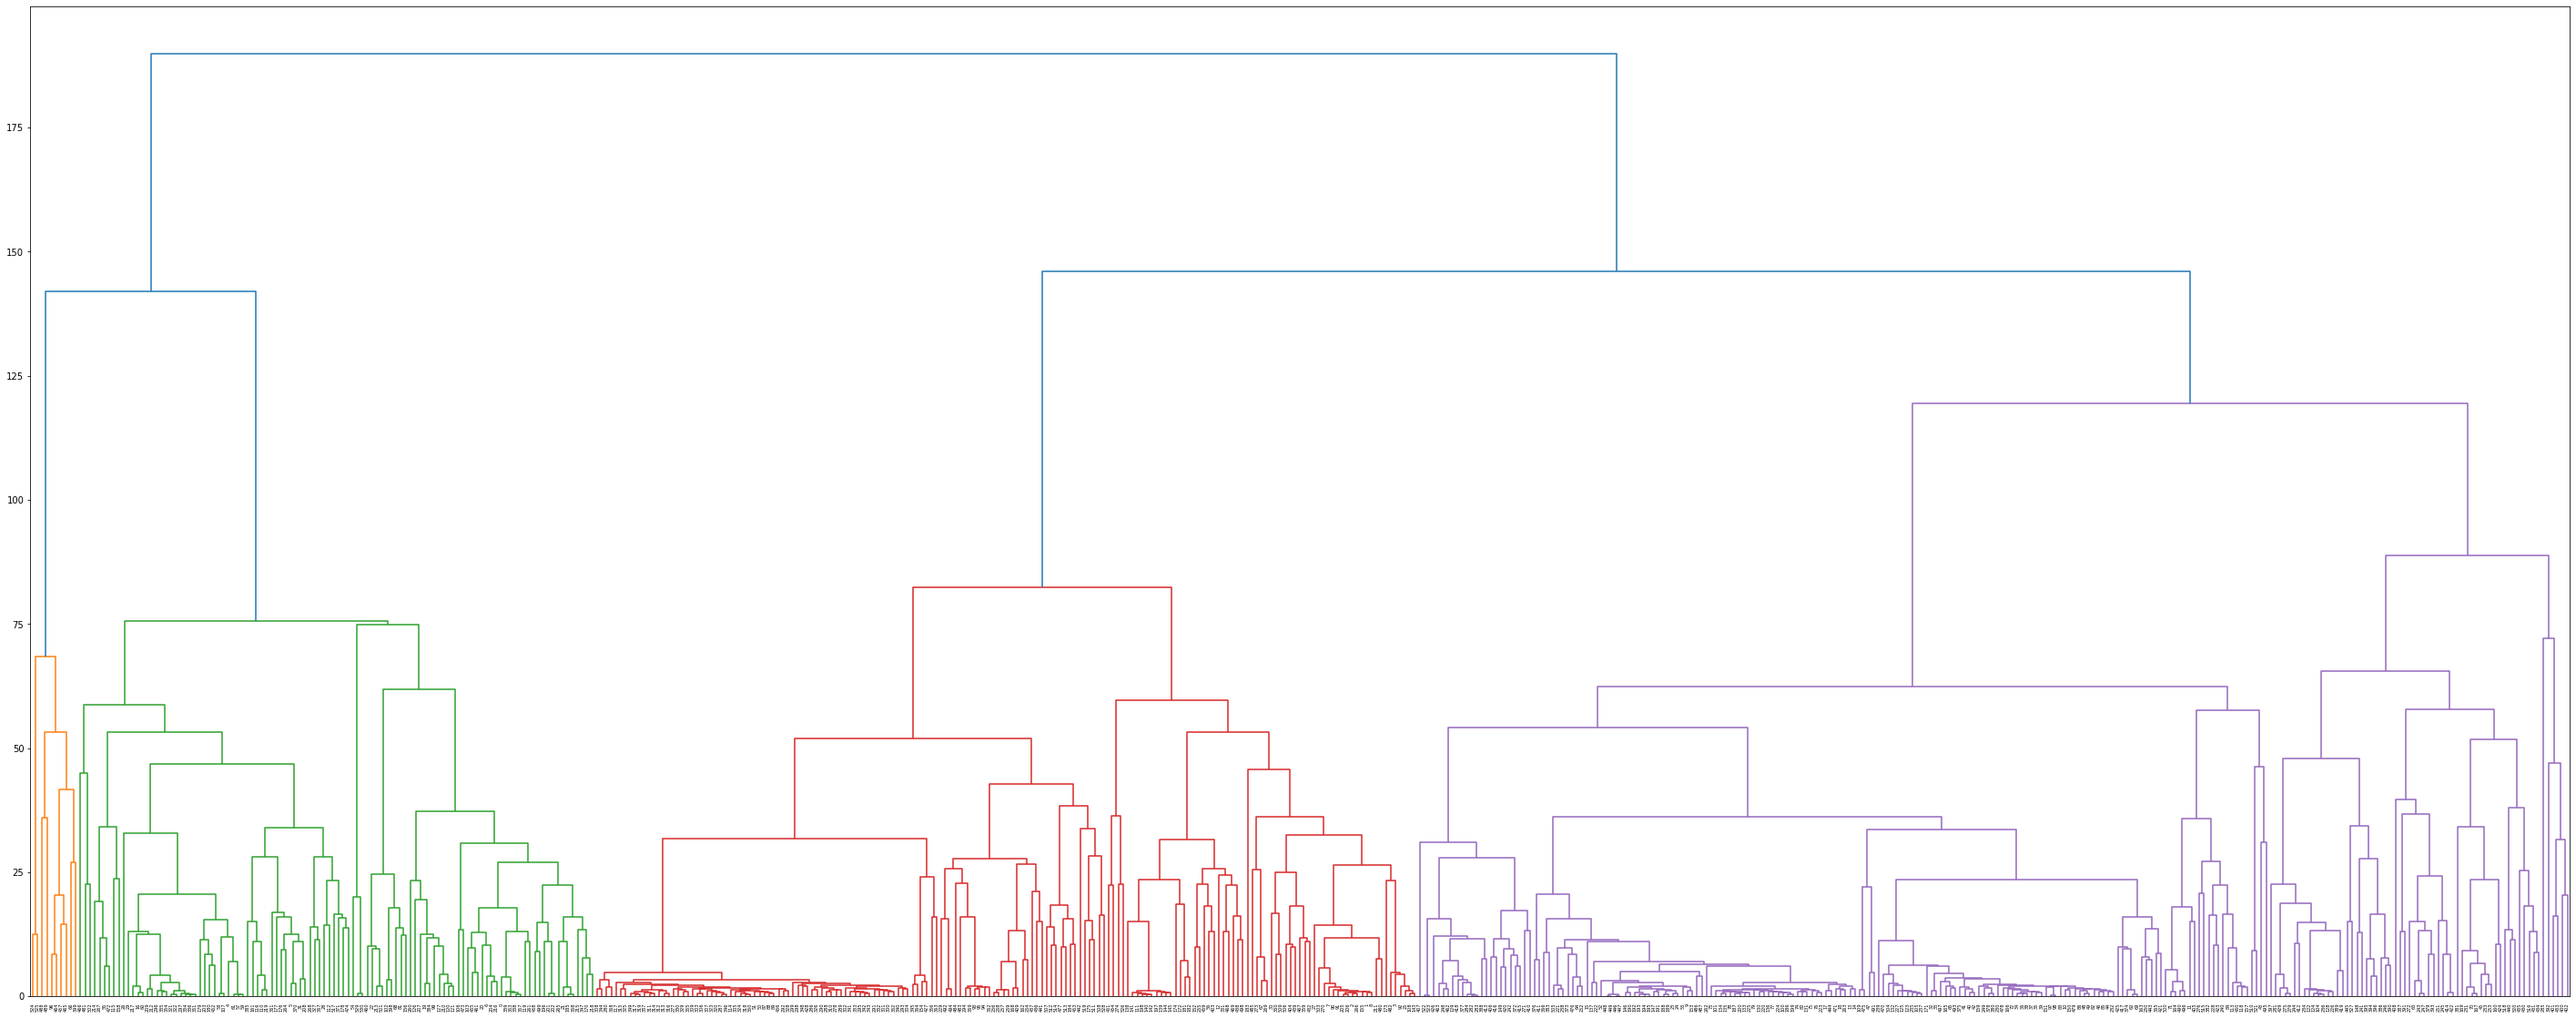

In [34]:
out_average = linkage(matrix, 'average')
fig = plt.figure(figsize=(50,20))
dn = dendrogram(out_average)

In [41]:
l = leaves_list(out_average)
#print(f"leaves_list: {l}")
tree = to_tree(out_average)
##############################
#Split the trees into usable groups
tree1 = tree.get_left()
tree2 = tree.get_right().get_left()
tree3 = tree.get_right().get_right()
idx1= tree1.count
idx2= idx1+tree2.count
grouped_list_average = [np.sort(l[:idx1]),np.sort(l[idx1:idx2]),np.sort(l[idx2:])]
n = tree.count
#print(f"grouped_list: {grouped_list}")
acc1=test_acc(n,grouped_list_average,copy.deepcopy(annotated_group_list))

print(f"acc1: {acc1}")

acc1: 59.69868173258004


/var/folders/rf/gvtptwp96wvd1g29v6rqbgj40000gn/T/ipykernel_12992/3790792498.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out_oo = linkage(matrix, 'ward',optimal_ordering=True)


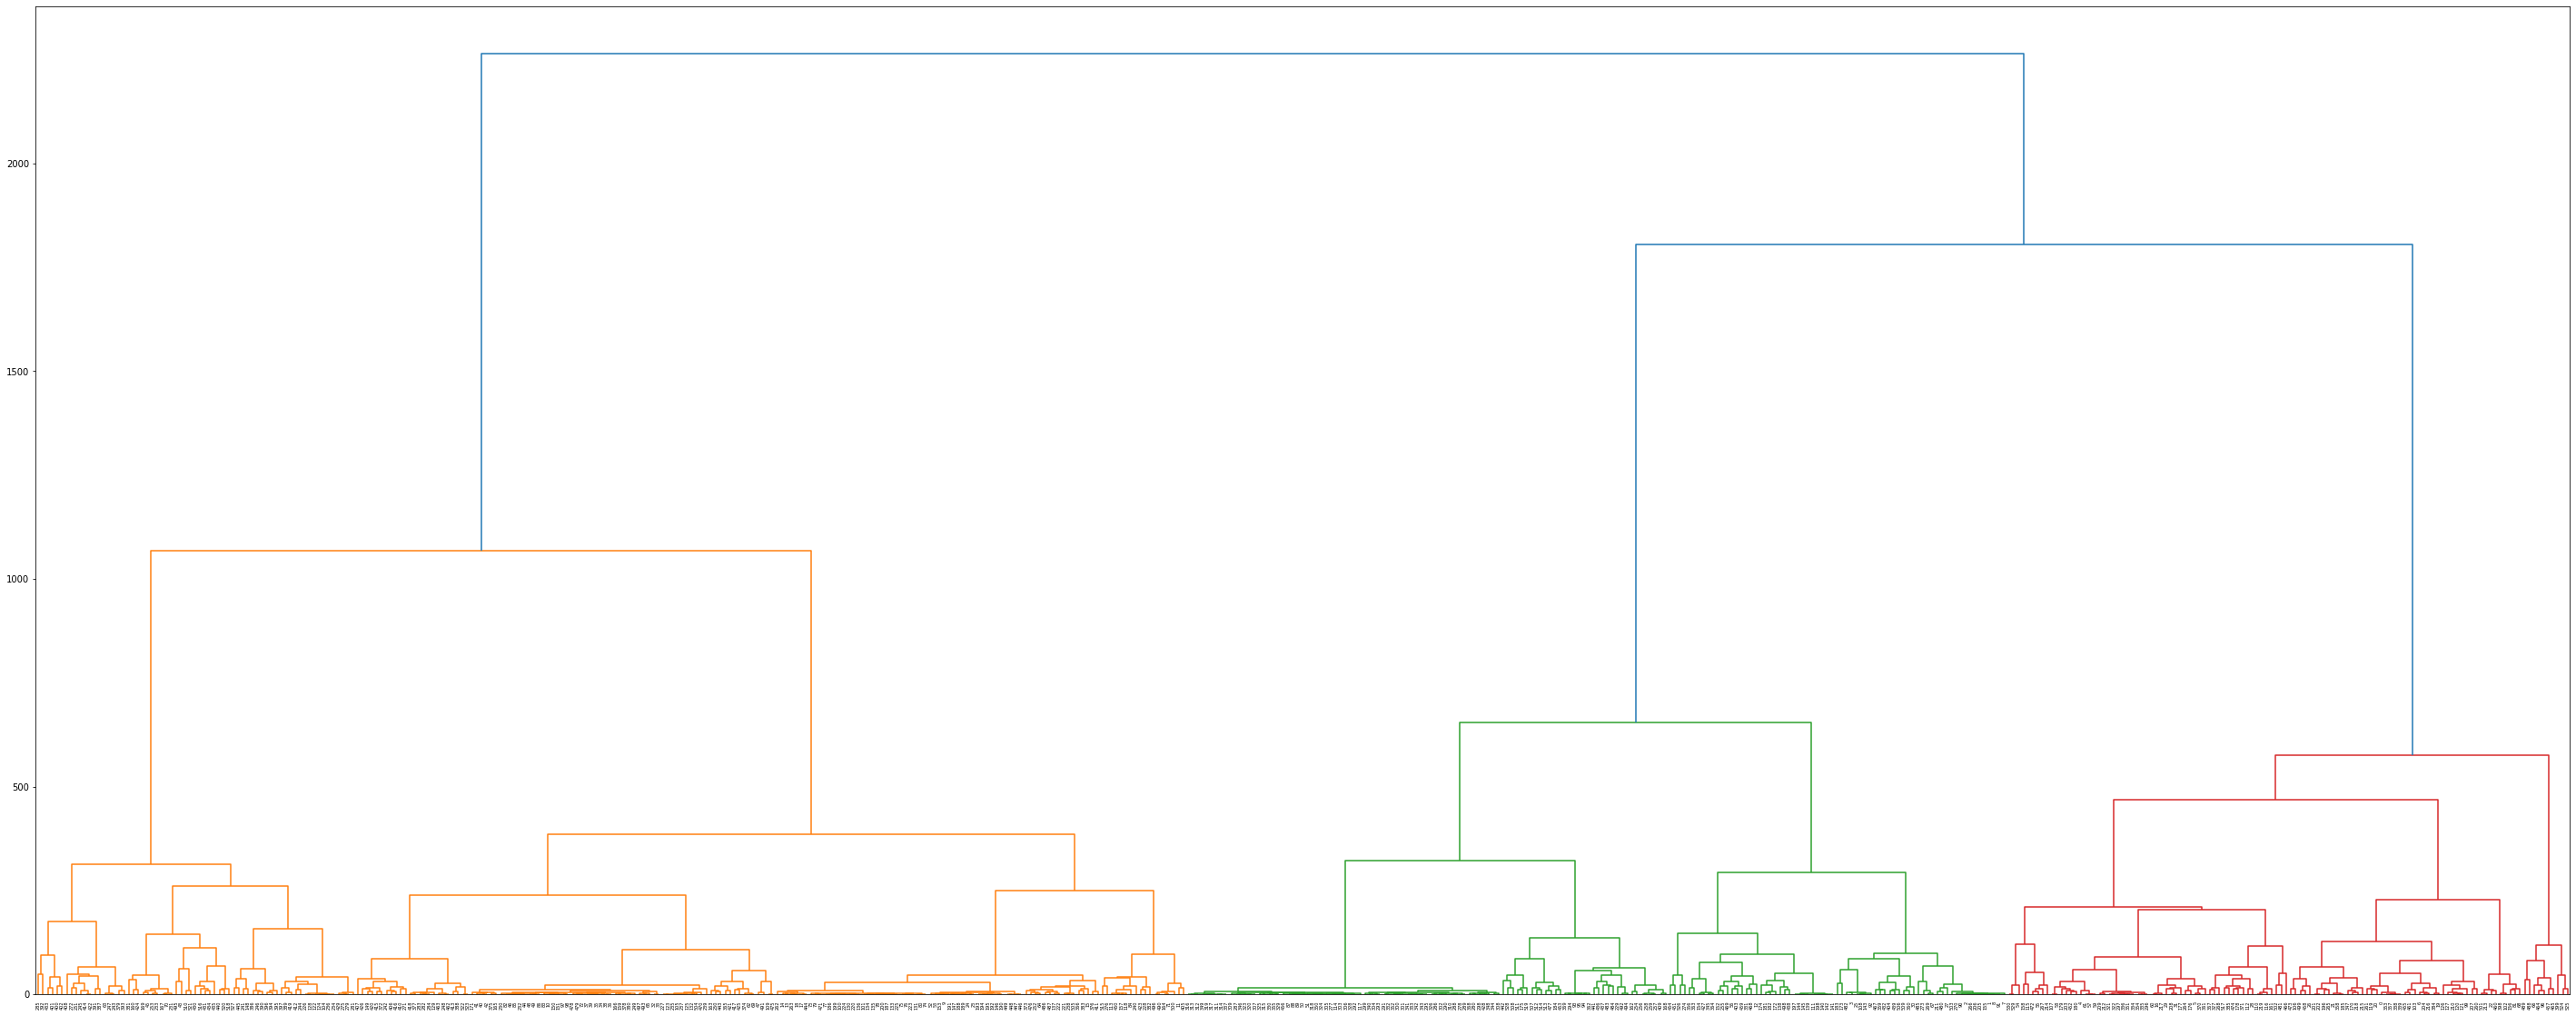

In [42]:
out_oo = linkage(matrix, 'ward',optimal_ordering=True)
fig = plt.figure(figsize=(50,20))
dn = dendrogram(out_oo)

In [43]:
l = leaves_list(out)
#print(f"leaves_list: {l}")
tree = to_tree(out)
##############################
#Split the trees into usable groups
yellow_tree = tree.get_left()
green_tree = tree.get_right().get_left()
red_tree = tree.get_right().get_right()
idx1= yellow_tree.count
idx2= idx1+green_tree.count
grouped_list_oo = [np.sort(l[:idx1]),np.sort(l[idx1:idx2]),np.sort(l[idx2:])]
n = tree.count
#print(f"grouped_list: {grouped_list}")
acc1=test_acc(n,grouped_list_oo,copy.deepcopy(annotated_group_list))

print(f"acc1: {acc1}")

acc1: 59.69868173258004


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:633: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='centroid', metric='euclidean')


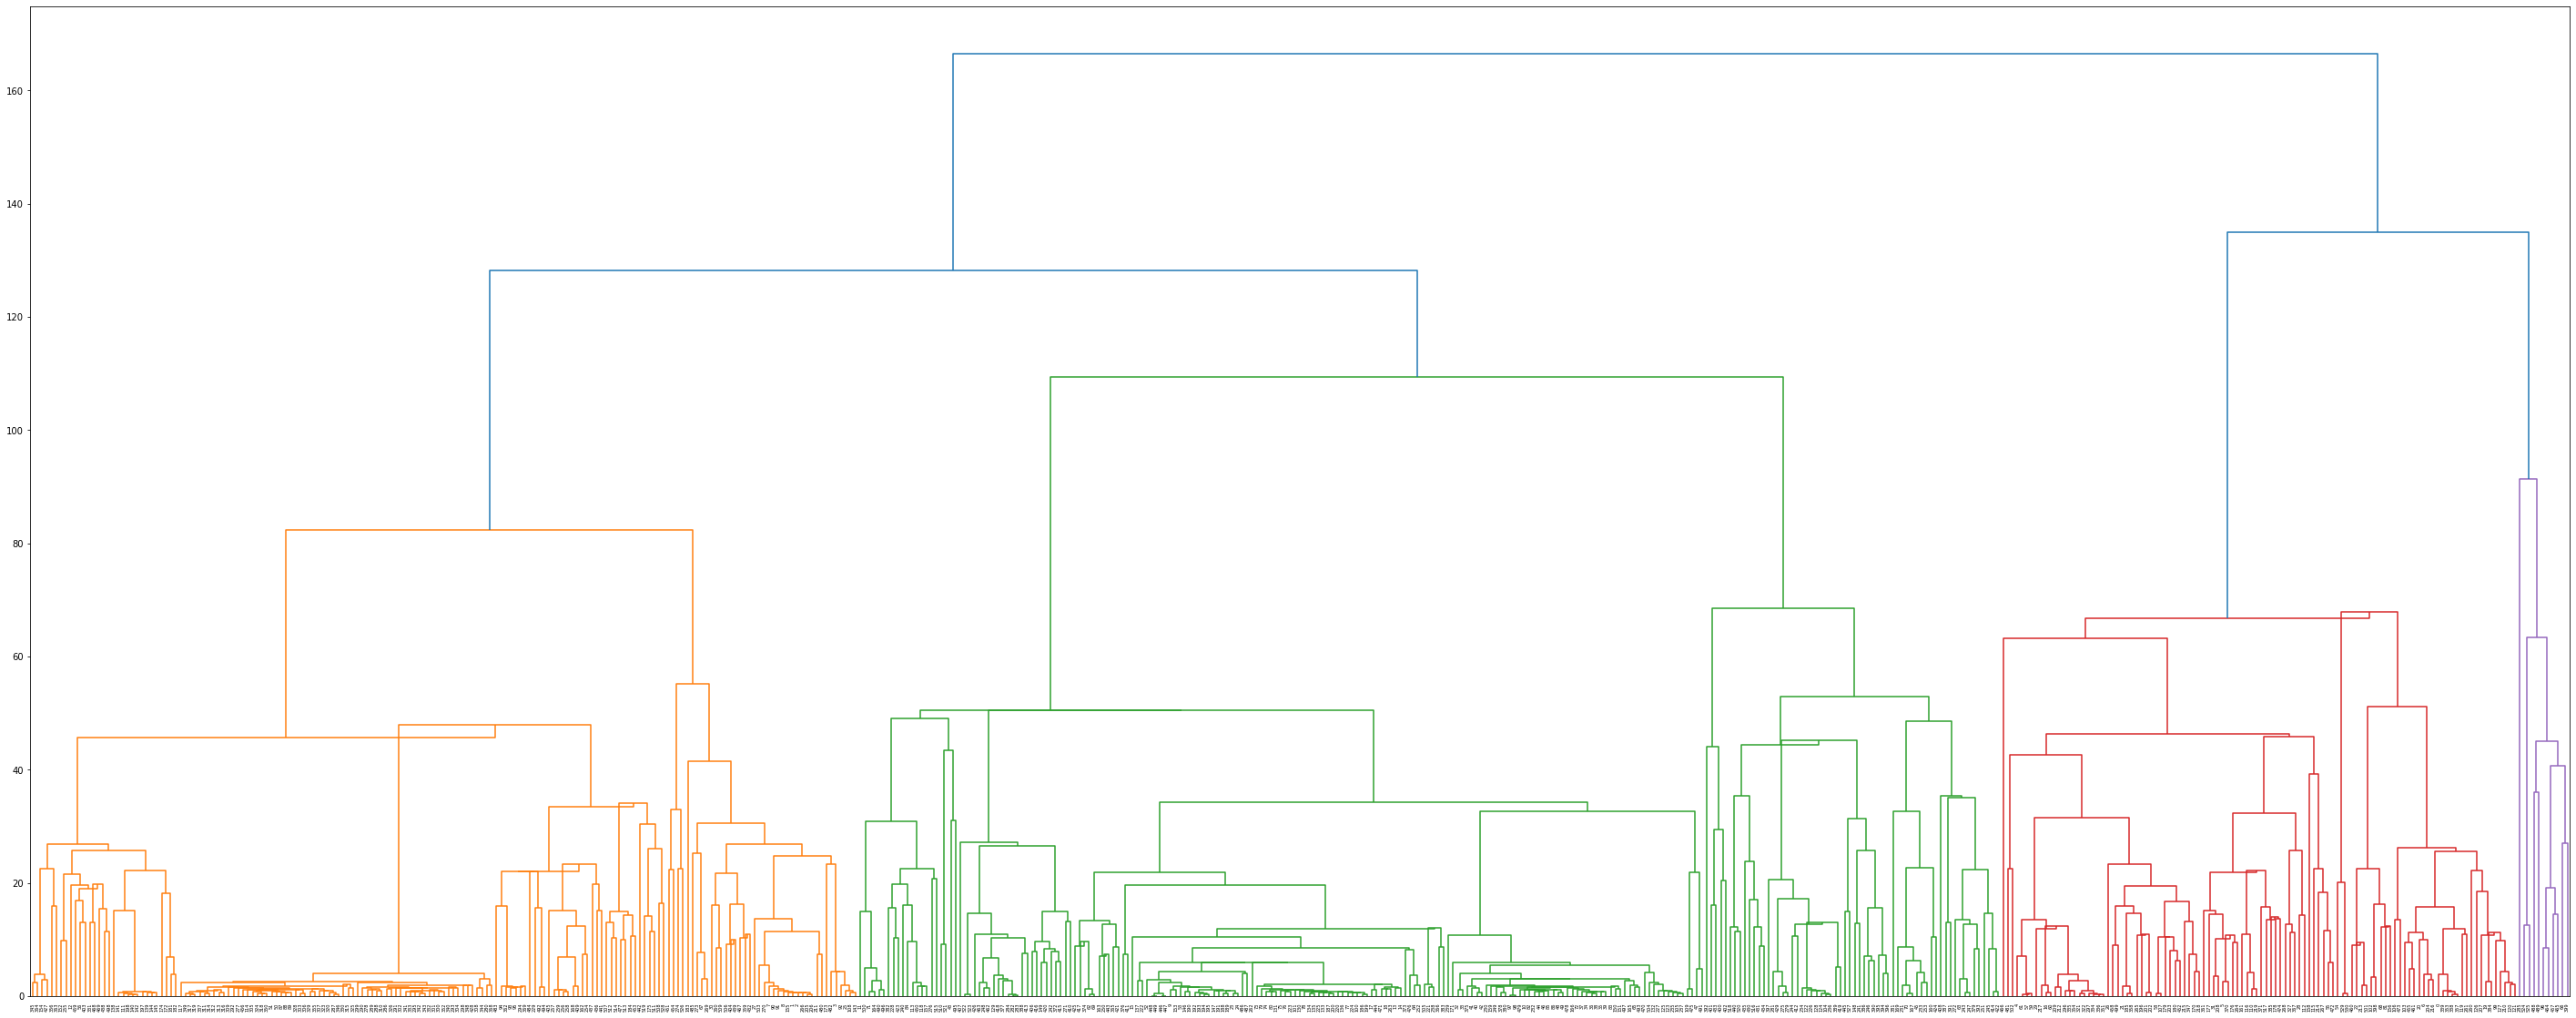

In [45]:
out_centroid = centroid(matrix)
fig = plt.figure(figsize=(50,20))
dn = dendrogram(out_centroid)

In [50]:
tree = to_tree(out_centroid)
##############################
#Split the trees into usable groups
yellow_tree = tree.get_left().get_left()
green_tree = tree.get_left().get_right()
red_tree = tree.get_right()
idx1= yellow_tree.count
idx2= idx1+green_tree.count
grouped_list_centroid = [np.sort(l[:idx1]),np.sort(l[idx1:idx2]),np.sort(l[idx2:])]
n = tree.count
#print(f"grouped_list: {grouped_list}")
acc1=test_acc(n,grouped_list_centroid,copy.deepcopy(annotated_group_list))

print(f"acc1: {acc1}")

acc1: 54.80225988700565


Centroid is less accurate than ward.